In [46]:
import pandas as pd
import datetime
from datetime import date
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [89]:
def get_data():
    # Read Data
    f = open("../ticker.csv", "r")
    tickers=f.read().split(",")
    df = yf.download(" ".join(tickers), period = "2y")
    df_close = df["Adj Close"]
    latest_index = df_close["^GSPC"].iloc[-1]
    ratios = df_close.iloc[:].div(df_close["^GSPC"], axis=0) * latest_index # Better way to do this?
    return ratios

def get_analysis(ratios):
    three_wk_mask = date.today()-ratios.index.date<=datetime.timedelta(days=21)
    three_m_mask = date.today()-ratios.index.date<=datetime.timedelta(days=91)
    one_yr_mask = date.today()-ratios.index.date<=datetime.timedelta(days=365)
    # st_multiplier = 2

    #Format Analysis
    analysis = pd.DataFrame(ratios.iloc[-1])
    analysis.rename({analysis.columns[0]:"latest"}, axis=1, inplace=True) # Better way to do this?
    analysis["three_wk_high"] = pd.DataFrame(ratios[three_wk_mask].max())
    analysis["three_wk_low"] = pd.DataFrame(ratios[three_wk_mask].min())
    analysis["three_m_high"] = pd.DataFrame(ratios[three_m_mask].max())
    analysis["three_m_low"] = pd.DataFrame(ratios[three_m_mask].min())
    analysis["one_yr_high"] = pd.DataFrame(ratios[one_yr_mask].max())
    analysis["one_yr_low"] = pd.DataFrame(ratios[one_yr_mask].min())
    # Better way to do this?
    analysis["three_wk_range"] = (analysis["latest"]-analysis["three_wk_low"])/((analysis["three_wk_high"]-analysis["three_wk_low"]))
    analysis["three_m_range"] = (analysis["latest"]-analysis["three_m_low"])/((analysis["three_m_high"]-analysis["three_m_low"]))
    analysis["one_yr_range"] = (analysis["latest"]-analysis["one_yr_low"])/((analysis["one_yr_high"]-analysis["one_yr_low"]))
    analysis["short_term_stochastic"] = analysis["one_yr_range"]-analysis["three_wk_range"]
    analysis["long_term_stochastic"] = analysis["one_yr_range"]-analysis["three_m_range"]
    analysis["short_term_potential"] = 1-analysis["latest"]/analysis["three_wk_high"]
    analysis["long_term_potential"] = 1-analysis["latest"]/analysis["three_m_high"]
    st_multiplier=((1-output["short_term_stochastic"])/output["short_term_potential"]).min()
    analysis["short_term_metric"] = analysis["short_term_stochastic"]+st_multiplier*analysis["short_term_potential"]
    # Save file

    # Return output
    return analysis

def run_analysis():
    ratios = get_data()
    output = get_analysis(ratios)
    return output

In [90]:
%%time
ratios = get_data()
output = get_analysis(ratios)
output
output.sort_values(by="short_term_metric",ascending=False,inplace=True)
my_shortterm = output.loc[["DG","BLK","ZBRA","QRVO","AMD","LULU","MSFT"]]
my_longterm = output.loc[["AMGN","AAPL","WMT","NFLX","INTC","KLAC","REGN"]]
output

[*********************100%***********************]  537 of 537 completed
Wall time: 36.9 s


,latest,three_wk_high,three_wk_low,three_m_high,three_m_low,one_yr_high,one_yr_low,three_wk_range,three_m_range,one_yr_range,short_term_stochastic,long_term_stochastic,short_term_potential,long_term_potential,short_term_metric
KMX,88.690002,98.854734,88.690002,98.854734,66.367369,100.959500,60.412882,0.000000,0.687117,0.697398,0.697398,0.010280,0.102825,0.102825,0.999105
OKE,27.639999,38.653892,27.639999,46.747150,27.639999,75.513608,19.514101,0.000000,0.000000,0.145107,0.145107,0.145107,0.284936,0.408734,0.981161
AAL,11.943800,17.154026,11.943800,19.763417,9.929258,35.657461,9.929258,0.000000,0.204851,0.078301,0.078301,-0.126551,0.303732,0.395661,0.969505
CCL,14.595000,20.555011,14.595000,24.239623,13.079100,51.661460,9.920787,0.000000,0.135827,0.111982,0.111982,-0.023845,0.289954,0.397887,0.962760
ADSK,239.350006,243.506878,239.156717,243.506878,175.873961,243.506878,147.055294,0.044433,0.938538,0.956902,0.912469,0.018364,0.017071,0.017071,0.962558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CMCSA,40.080002,40.162728,38.550483,43.432487,38.511674,48.045611,38.511674,0.948689,0.318713,0.164499,-0.784189,-0.154214,0.002060,0.077188,-0.778146
CINF,68.220001,68.220001,62.696049,95.328449,53.570681,122.291057,53.570681,1.000000,0.350817,0.213173,-0.786827,-0.137644,0.000000,0.284369,-0.786827
PG,122.230003,122.230003,118.260505,136.648780,115.846133,153.029402,114.139047,1.000000,0.306878,0.208045,-0.791955,-0.098832,0.000000,0.105517,-0.791955
AEE,73.320000,73.590067,70.185410,88.498085,70.185410,99.239737,70.185410,0.920677,0.171171,0.107887,-0.812790,-0.063283,0.003670,0.171508,-0.802022


In [91]:
my_shortterm

,latest,three_wk_high,three_wk_low,three_m_high,three_m_low,one_yr_high,one_yr_low,three_wk_range,three_m_range,one_yr_range,short_term_stochastic,long_term_stochastic,short_term_potential,long_term_potential,short_term_metric
DG,187.850006,197.595739,185.120118,205.053281,180.650490,205.053281,138.948184,0.218818,0.295028,0.739759,0.520941,0.444730,0.049322,0.083897,0.665659
BLK,550.039978,563.914574,548.954303,563.914574,494.725669,563.914574,430.428294,0.072571,0.799468,0.896060,0.823489,0.096592,0.024604,0.024604,0.895682
ZBRA,254.149994,268.478052,253.611772,273.332767,221.661640,273.332767,191.857092,0.036204,0.628753,0.764558,0.728354,0.135806,0.053368,0.070181,0.884945
QRVO,113.089996,113.794438,109.286357,114.604187,93.308226,115.106312,72.702856,0.843738,0.928898,0.952449,0.108711,0.023552,0.006190,0.013212,0.126875
AMD,52.935001,55.243689,51.797665,63.985470,51.544474,63.985470,30.382063,0.330043,0.111770,0.671150,0.341107,0.559381,0.041791,0.172703,0.463730
LULU,306.559998,316.549820,301.029226,326.075596,224.194293,326.075596,180.178462,0.356351,0.808448,0.866237,0.509887,0.057790,0.031558,0.059850,0.602485
MSFT,208.960007,208.960007,194.849838,208.960007,183.290861,208.960007,141.408052,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


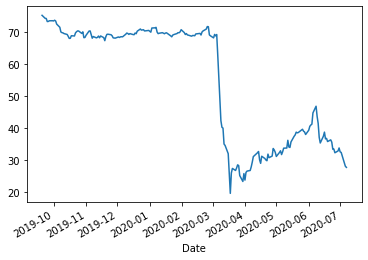

In [94]:
plt.close('all')
ratios["OKE"].tail(200).plot()